In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [31]:
data = pd.read_csv('../../Resources/data/regression/house-prices-advanced-regression-techniques/train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Regression using One Feature 

In [34]:
X = data['GrLivArea']
y = data['SalePrice']

X.shape

(1460,)

In [35]:
X = (X - X.mean()) / X.std()
X

0       0.370207
1      -0.482347
2       0.514836
3       0.383528
4       1.298881
          ...   
1455    0.250316
1456    1.061003
1457    1.569110
1458   -0.832502
1459   -0.493765
Name: GrLivArea, Length: 1460, dtype: float64

In [36]:
X = np.c_[np.ones(X.shape[0]), X]
X

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

#### Gradient Descent

In [37]:
np.random.seed(42069)
lr = 0.01
iterations = 1000
m = y.shape[0]
theta = np.random.rand(X.shape[1])

print('Learning Rate (Alpha): ', lr)
print('Size (m): ', m)
print('Initial theta: ', theta)

Learning Rate (Alpha):  0.01
Size (m):  1460
Initial theta:  [0.03050837 0.4194086 ]


In [38]:
def gradient_descent(X, y, theta, iterations, lr):
    past_costs = []
    past_thetas = [theta]
    
    for i in range(iterations):
        prediction = np.dot(X, theta)
        
        ## SSE
        error = prediction - y
        cost = (1/2*m) * np.dot(error.T, error) 
        
        past_costs.append(cost)
        
        theta = theta - (lr * (1/m) * np.dot(X.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [39]:
thetas, costs = gradient_descent(X, y, theta, iterations, lr)

In [40]:
theta = thetas[-1]
theta

array([180913.38529802,  56292.4549303 ])

In [46]:
print('Gradient Descent Params: {:.2f}, {:.2f}'.format(theta[0], theta[1]))

Gradient Descent Params: 180913.39, 56292.45


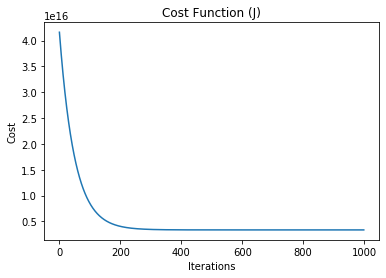

In [42]:
plt.title('Cost Function (J)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(costs)
plt.show()

#### Animation

In [43]:
fig = plt.figure()
ax = plt.axes()
plt.title('House Price Prediction')
plt.scatter(X[:, 1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 70000, '')
annotation.set_animated(True)
plt.close()

def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation


def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = thetas[i][1] * x + thetas[i][0]
    line.set_data(x, y)
    
    annotation.set_text('Cost = {:.2f}'.format(costs[i]/10000000000))
    return line, annotation


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=300, interval=0, blit=True)
anim.save('animation.gif', writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.



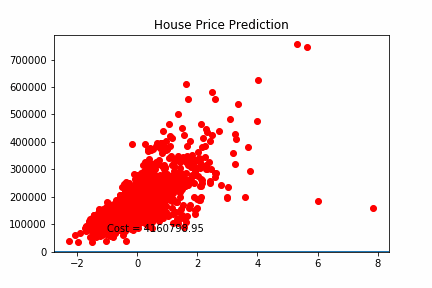

In [44]:
import io
import base64
from IPython.display import HTML

video = io.open('animation.gif', 'rb').read()
encoded = base64.b64encode(video)

HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### Gradient Descent using Two variables

In [47]:
X = data[['GrLivArea', 'LotArea']]
y = data['SalePrice']

X.shape

(1460, 2)

In [48]:
X = (X - X.mean()) / X.std()
X

GrLivArea   LotArea
0      0.370207 -0.207071
1     -0.482347 -0.091855
2      0.514836  0.073455
3      0.383528 -0.096864
4      1.298881  0.375020
...         ...       ...
1455   0.250316 -0.260471
1456   1.061003  0.266316
1457   1.569110 -0.147760
1458  -0.832502 -0.080133
1459  -0.493765 -0.058092

[1460 rows x 2 columns]

In [49]:
X = np.c_[np.ones(X.shape[0]), X]
X

array([[ 1.        ,  0.37020659, -0.20707076],
       [ 1.        , -0.48234664, -0.0918549 ],
       [ 1.        ,  0.51483616,  0.07345481],
       ...,
       [ 1.        ,  1.56910958, -0.14775964],
       [ 1.        , -0.83250243, -0.08013294],
       [ 1.        , -0.49376477, -0.05809164]])

#### Gradient Descent

In [50]:
np.random.seed(42069)
lr = 0.01
iterations = 1000
m = y.shape[0]
theta = np.random.rand(X.shape[1])

print('Learning Rate (Alpha): ', lr)
print('Size (m): ', m)
print('Initial theta: ', theta)

Learning Rate (Alpha):  0.01
Size (m):  1460
Initial theta:  [0.03050837 0.4194086  0.87769215]


In [51]:
def gradient_descent(X, y, theta, iterations, lr):
    past_costs = []
    past_thetas = [theta]
    
    for i in range(iterations):
        prediction = np.dot(X, theta)
        
        ## SSE
        error = prediction - y
        cost = (1/2*m) * np.dot(error.T, error) 
        
        past_costs.append(cost)
        
        theta = theta - (lr * (1/m) * np.dot(X.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [52]:
thetas, costs = gradient_descent(X, y, theta, iterations, lr)

In [53]:
theta = thetas[-1]
theta

array([180913.38529802,  54541.98618514,   6620.27701344])

In [55]:
print('Gradient Descent Params: {:.2f}, {:.2f}, {:.2f}'.format(theta[0], theta[1], theta[2]))

Gradient Descent Params: 180913.39, 54541.99, 6620.28


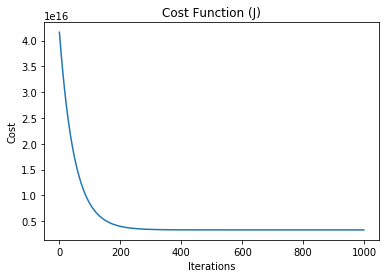

In [56]:
plt.title('Cost Function (J)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(costs)
plt.show()